### Initial Dataset Exploration

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Examining dataset
weather_df = pd.read_csv("seattle-weather.csv")
weather_df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [3]:
#Checking for null values
null_values = weather_df.isnull().sum()
print(f"Null Values :\n{null_values} ")

Null Values :
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64 


In [4]:
#Checking dimensions
print(weather_df.shape)

(1461, 6)


In [5]:
#Checking data types
print(weather_df.dtypes)

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [6]:
#All data barring date and weather are numeric. For weather, we will categorize to make it numeric. For date, we will extract
#date, month, and year, and have them as numeric values in respective columns.

#Checking descriptive statistics
print(weather_df.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


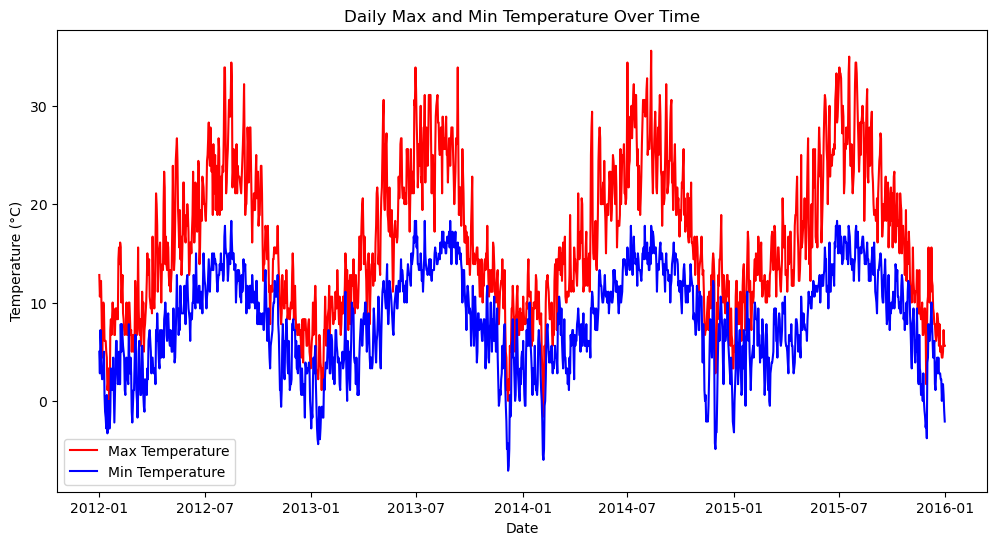

In [7]:

# Convert date column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for time series plots
weather_df.set_index('date', inplace=True)

# Plot for Max and Min Temp over time
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df['temp_max'], label='Max Temperature', color='red')
plt.plot(weather_df.index, weather_df['temp_min'], label='Min Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Max and Min Temperature Over Time')
plt.legend()
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_91157/3214149700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')


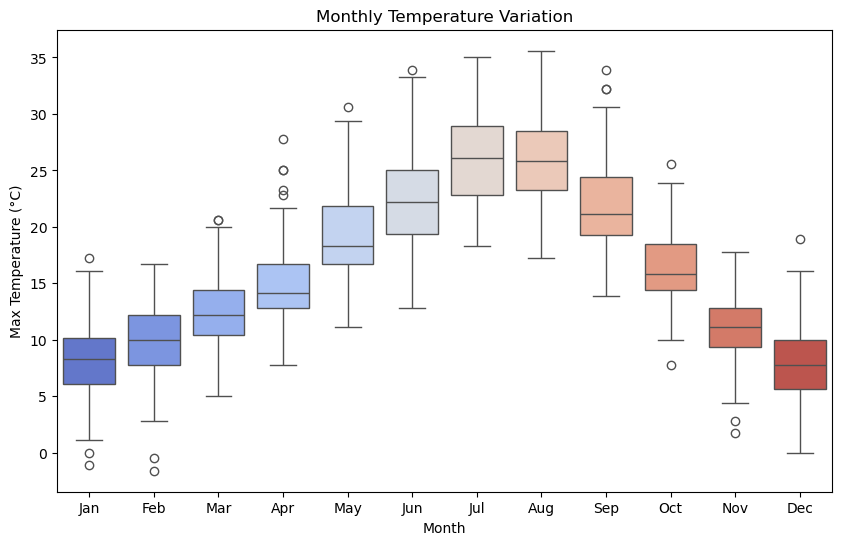

In [8]:
weather_df['month'] = weather_df.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°C)')
plt.title('Monthly Temperature Variation')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_91157/3852600336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')


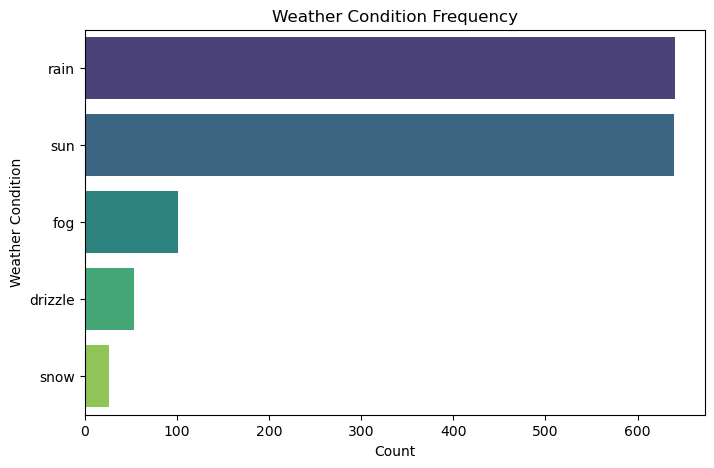

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.title('Weather Condition Frequency')
plt.show()

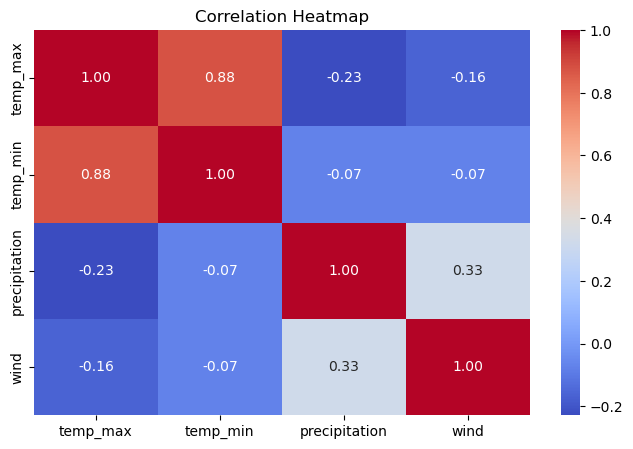

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(weather_df[['temp_max', 'temp_min', 'precipitation', 'wind']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Machine Learning Preprocessing

In [12]:

pp_weather_df = weather_df.copy()

pp_weather_df['year'] = pp_weather_df.index.year
pp_weather_df['month'] = pp_weather_df.index.month
pp_weather_df['day'] = pp_weather_df.index.day
pp_weather_df['day_of_week'] = pp_weather_df.index.dayofweek

pp_weather_df = pd.get_dummies(pp_weather_df, columns=['weather'], prefix='weather')
weather_columns = ['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
pp_weather_df[weather_columns] = pp_weather_df[weather_columns].astype(int)

output_file = "pp_weather.csv"
pp_weather_df.to_csv(output_file, index=False)

pp_weather_df.head()


,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0
